In [1]:
import pandas as pd
import numpy as np
import TestFunctions as tf

In [2]:
info = tf.getInfo_ATC_True("pat-na1-3c7b0af9-bb66-40e7-a256-ce4c5eb27e81")

In [3]:
info.to_csv('Pure_Base.csv', index=False)

In [4]:
info.head(5)

,ID,First Name,Last Name,Email,Phone,Country,Technical_test_created_date,Industry,Address,Allowed to Collect
0,416102,Zoe,Owen,Zoe <zoe_owen450104633@acrit.org> Contact Info.,0-774-386-624,Waterford,2021-07-13,Poultry and fish,"Blackpool Rue, 6576",true
1,413403,Zara,Rodwell,Zara <zara_rodwell1398442854@nickia.com> Conta...,6-777-367-783,Ireland,2021-01-09,Fruit and vegetables,"Parkfield Avenue, 5340",true
2,417951,Zara,Freeburn,Zara <zara_freeburn1593147546@gmail.com> Conta...,5-618-556-540,Ireland,2021-08-30,Milling,"Abourne Lane, 876",true
3,419852,Winnie,Walter,Winnie <winnie_walter538064895@sheye.org> Cont...,1-161-604-327,Dublin,2021-02-10,Dairy products,"Chester Crossroad, 7070",true
4,425352,Zoe,Owen,Zoe <zoe_owen1652446013@bungar.biz> Contact Info.,5-645-416-200,Dublin,2021-11-02,Meat,"Tilloch Crossroad, 8332",true


In [5]:
irl_list = tf.eng_detection('IE')
eng_list = tf.eng_detection('GB')

In [6]:
info['Country City Detection'] = np.where(info['Country'].isin(['England', 'Ireland']), "Country", 
                                np.where(info['Country'].isna(), "No Information - Empty", "City"))

In [7]:
info['Country Detection'] = tf.detect_country(info['Country'], eng_list, irl_list)

In [8]:
info['Country'] = info['Country Detection'].apply(lambda x: x[0])
info['City'] = info['Country Detection'].apply(lambda x: x[1])

In [9]:
info['Raw Email'] = tf.raw_emails(info['Email'])

In [10]:
info['Assigned Number'] = tf.clean_numbers(info['Phone'], info['Country Detection'].apply(lambda x: x[0]))

In [11]:
info['Fullname'] = info['First Name'] + ' ' + info['Last Name']

In [12]:
info

,ID,First Name,Last Name,Email,Phone,Country,Technical_test_created_date,Industry,Address,Allowed to Collect,Country City Detection,Country Detection,City,Raw Email,Assigned Number,Fullname
0,416102,Zoe,Owen,Zoe <zoe_owen450104633@acrit.org> Contact Info.,0-774-386-624,Ireland,2021-07-13,Poultry and fish,"Blackpool Rue, 6576",true,City,"(Ireland, Waterford)",Waterford,zoe_owen450104633@acrit.org,(+353) 774386624,Zoe Owen
1,413403,Zara,Rodwell,Zara <zara_rodwell1398442854@nickia.com> Conta...,6-777-367-783,Ireland,2021-01-09,Fruit and vegetables,"Parkfield Avenue, 5340",true,Country,"(Ireland, -)",-,zara_rodwell1398442854@nickia.com,(+353) 6777367783,Zara Rodwell
2,417951,Zara,Freeburn,Zara <zara_freeburn1593147546@gmail.com> Conta...,5-618-556-540,Ireland,2021-08-30,Milling,"Abourne Lane, 876",true,Country,"(Ireland, -)",-,zara_freeburn1593147546@gmail.com,(+353) 5618556540,Zara Freeburn
3,419852,Winnie,Walter,Winnie <winnie_walter538064895@sheye.org> Cont...,1-161-604-327,Ireland,2021-02-10,Dairy products,"Chester Crossroad, 7070",true,City,"(Ireland, Dublin)",Dublin,winnie_walter538064895@sheye.org,(+353) 1161604327,Winnie Walter
4,425352,Zoe,Owen,Zoe <zoe_owen1652446013@bungar.biz> Contact Info.,5-645-416-200,Ireland,2021-11-02,Meat,"Tilloch Crossroad, 8332",true,City,"(Ireland, Dublin)",Dublin,zoe_owen1652446013@bungar.biz,(+353) 5645416200,Zoe Owen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,463801,Rhea,Grady,Rhea <rhea_grady231044837@deons.tech> Contact ...,2-301-310-740,Ireland,2021-04-24,Fruit and vegetables,"Cato Hill, 5704",true,City,"(Ireland, Waterford)",Waterford,rhea_grady231044837@deons.tech,(+353) 2301310740,Rhea Grady
6932,454595,Hailey,Farrell,Hailey <hailey_farrell934796609@brety.org> Con...,6-747-016-018,England,2021-12-04,Bakery products,"Howard Crossroad, 9998",true,City,"(England, London)",London,hailey_farrell934796609@brety.org,(+44) 6747016018,Hailey Farrell
6933,454631,Caleb,Purvis,Caleb <caleb_purvis1251615808@iatim.tech> Cont...,5-516-171-174,Ireland,2021-02-23,Animal feeds,"Walnut Rue, 3859",true,City,"(Ireland, Dublin)",Dublin,caleb_purvis1251615808@iatim.tech,(+353) 5516171174,Caleb Purvis
6934,457622,Gina,Weasley,Gina <gina_weasley83573127@naiker.biz> Contact...,0-605-727-343,England,2021-10-02,Bakery products,"Kimberley Pass, 3455",true,City,"(England, Plymouth)",Plymouth,gina_weasley83573127@naiker.biz,(+44) 605727343,Gina Weasley


In [13]:
info_no_dup = tf.duplicates_managment(info, 'Technical_test_created_date', 'Fullname')

In [14]:
info_no_dup

,Fullname,First Name,Last Name,Temporary ID,Original Created Date,Address,Country,City,Country City Detection,Country Detection,Email,Phone,Original Industry
0,Abbey Porter,Abbey,Porter,457508,2021-05-12,"Besson Avenue, 1005",Ireland,Limerick,City,"(Ireland, Limerick)",abbey_porter75675783@vetan.org,(+353) 8532182466,Poultry and fish
1,Abdul Fisher,Abdul,Fisher,454197,2021-12-07,"Edwin Rue, 3956",England,-,Country,"(England, -)",abdul_fisher666937132@twipet.com,(+44) 4231262651,Milling;Poultry and fish
2,Abdul Fox,Abdul,Fox,457516,2021-08-29,"Arlington Pass, 1149",Ireland,Dublin,City,"(Ireland, Dublin)",abdul_fox283273357@joiniaa.com,(+353) 3186084424,Meat;Bakery products;Animal feeds
3,Abdul Graves,Abdul,Graves,459767,2021-07-18,"Cheney Hill, 5758",England,Milton Keynes,City,"(England, Milton Keynes)",abdul_graves475323926@jiman.org,(+44) 8056733305,Animal feeds;Animal feeds
4,Abdul Hunt,Abdul,Hunt,452538,2021-11-10,"Chatsworth Way, 4027",England,Oxford,City,"(England, Oxford)",abdul_hunt1407009784@bauros.biz,(+44) 6755718302,Meat;Milling;Bakery products
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,Zoe Jackson,Zoe,Jackson,454591,2021-10-12,"Balfe Boulevard, 9646",Ireland,Dublin,City,"(Ireland, Dublin)",zoe_jackson621011117@bauros.biz,(+353) 6770631020,Bakery products
3480,Zoe Owen,Zoe,Owen,425352,2021-11-02,"Tilloch Crossroad, 8332",Ireland,Dublin,City,"(Ireland, Dublin)",zoe_owen1652446013@bungar.biz,(+353) 5645416200,Meat;Poultry and fish
3481,Zoe Summers,Zoe,Summers,459018,2021-03-15,"Catherine Drive, 8284",Ireland,-,Country,"(Ireland, -)",zoe_summers84316065@infotech44.tech,(+353) 6706675718,Milling
3482,Zoe Wallace,Zoe,Wallace,460612,2021-05-29,"Bermondsey Drive, 6035",Ireland,Waterford,City,"(Ireland, Waterford)",zoe_wallace901459604@sveldo.biz,(+353) 7385000772,Poultry and fish


In [15]:
info_no_dup['Original Industry'] = ';' + info_no_dup['Original Industry'].str.split(";\s*").map(set).str.join(";")

In [16]:
info_no_dup.to_csv('ETL_Base.csv', index=False)

In [17]:
country_unique_graph = info['Country Detection'].value_counts()
country_unique_graph_no_dup = info_no_dup['Country Detection'].value_counts()

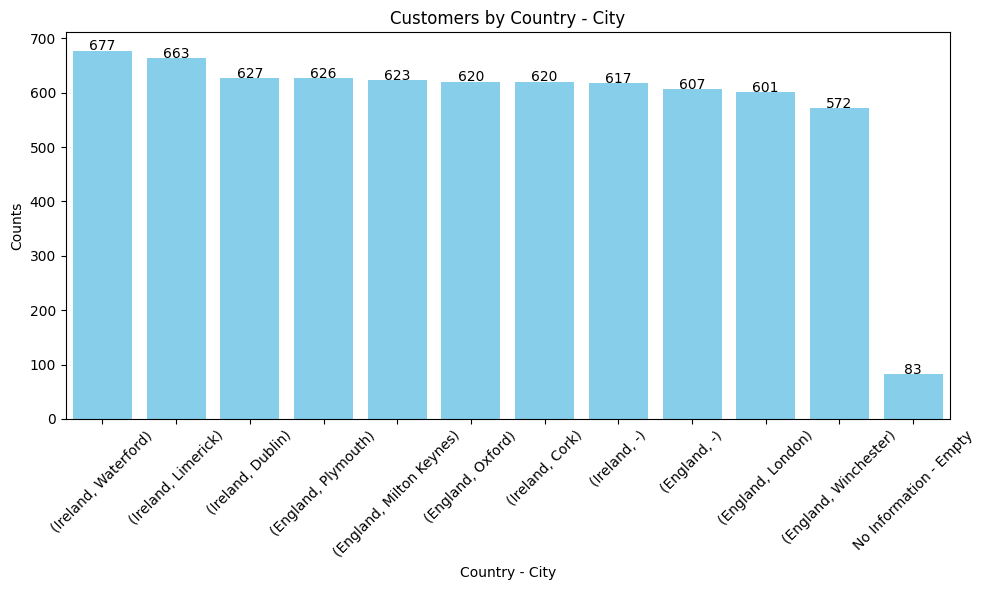

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
country_unique_graph.plot(kind='bar', color='skyblue')  

counts = country_unique_graph.values
plt.bar(range(len(counts)), counts, color='skyblue')

for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), color='black', ha='center')

plt.title('Customers by Country - City')
plt.xlabel('Country - City')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

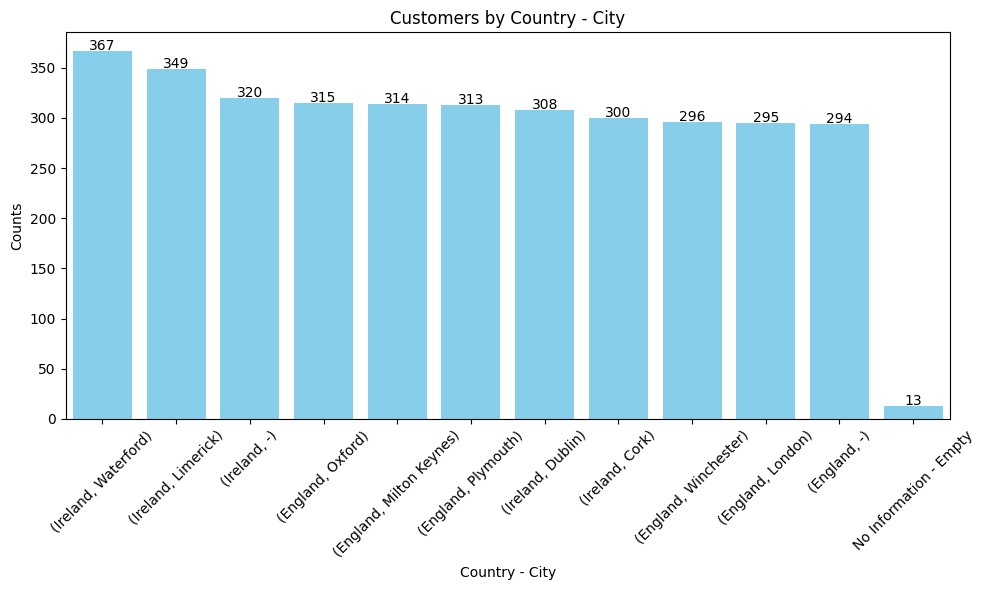

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
country_unique_graph_no_dup.plot(kind='bar', color='skyblue')  

counts = country_unique_graph_no_dup.values
plt.bar(range(len(counts)), counts, color='skyblue')

for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), color='black', ha='center')

plt.title('Customers by Country - City')
plt.xlabel('Country - City')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
original_industry_graph = info['Industry'].value_counts()
original_industry_graph_no_dup = info_no_dup['Original Industry'].value_counts().nlargest(10)

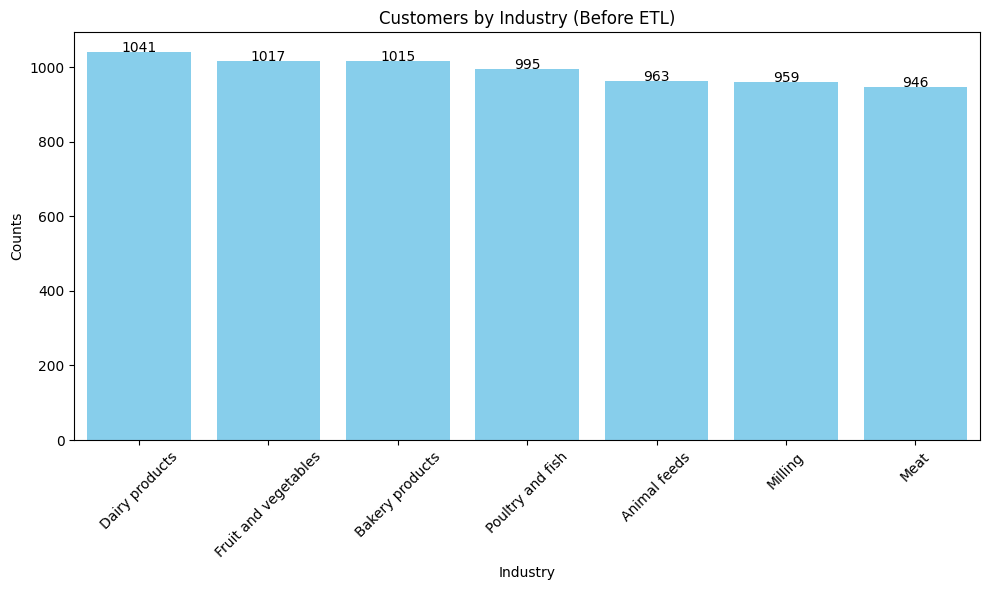

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
original_industry_graph.plot(kind='bar', color='skyblue')  

counts = original_industry_graph.values
plt.bar(range(len(counts)), counts, color='skyblue')

for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), color='black', ha='center')

plt.title('Customers by Industry (Before ETL)')
plt.xlabel('Industry')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

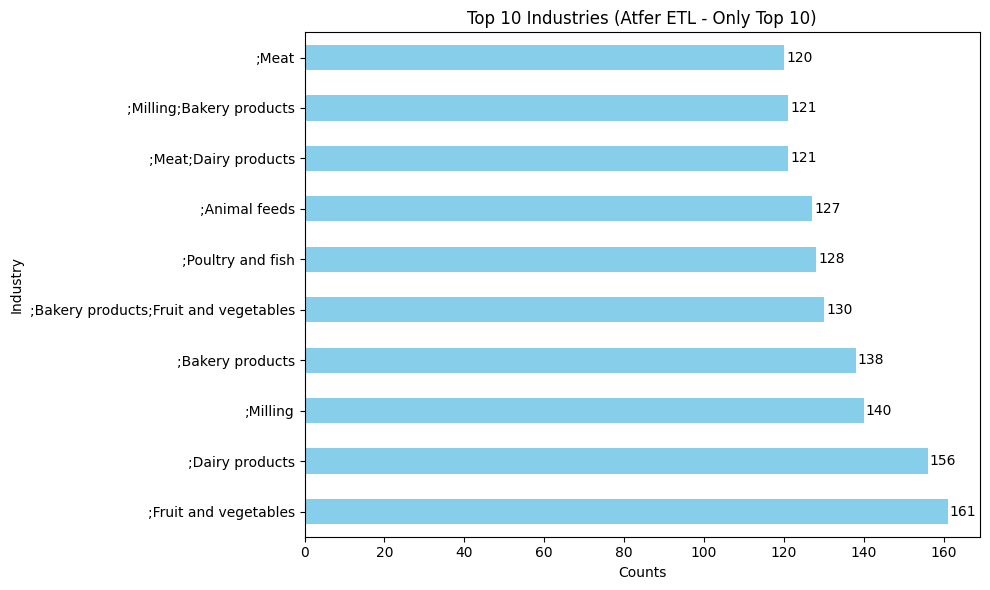

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
original_industry_graph_no_dup.plot(kind='barh', color='skyblue')

counts = original_industry_graph_no_dup.values

for i, count in enumerate(counts):
    plt.text(count + 0.5, i, str(count), color='black', va='center') 

plt.title('Top 10 Industries (Atfer ETL - Only Top 10)')
plt.xlabel('Counts')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

In [23]:
domains = info['Raw Email'].apply(lambda x: x.split('@')).apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else 'No information - Empty').value_counts()
domains_no_dup = info_no_dup['Email'].apply(lambda x: x.split('@')).apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else 'No information - Empty').value_counts()

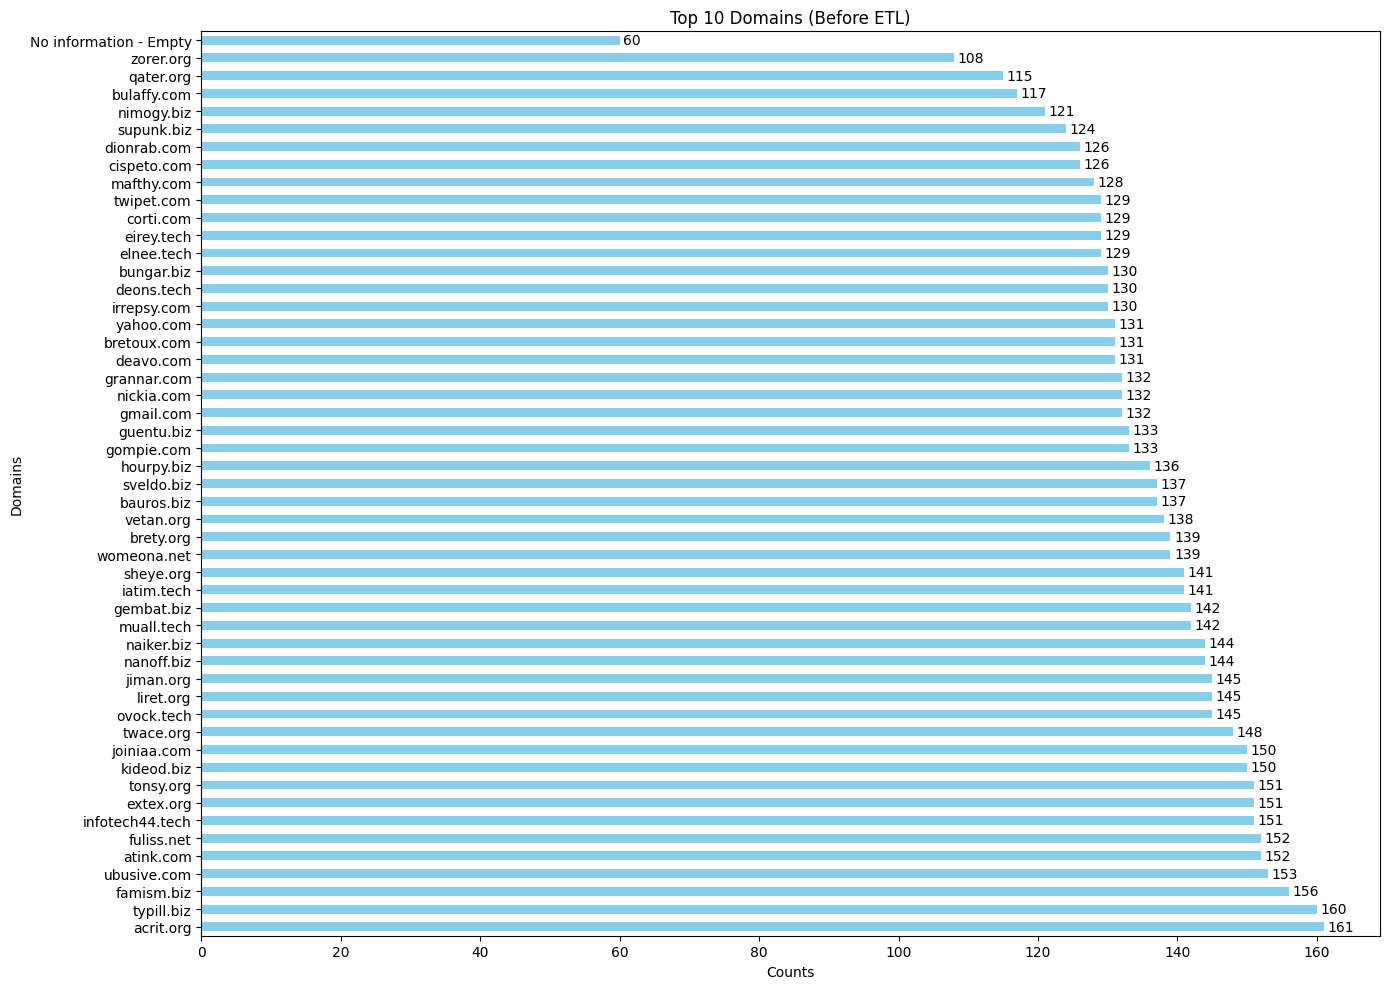

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))  
domains.plot(kind='barh', color='skyblue')

counts = domains.values

for i, count in enumerate(counts):
    plt.text(count + 0.5, i, str(count), color='black', va='center') 

plt.title('Top 10 Domains (Before ETL)')
plt.xlabel('Counts')
plt.ylabel('Domains')
plt.tight_layout()
plt.show()

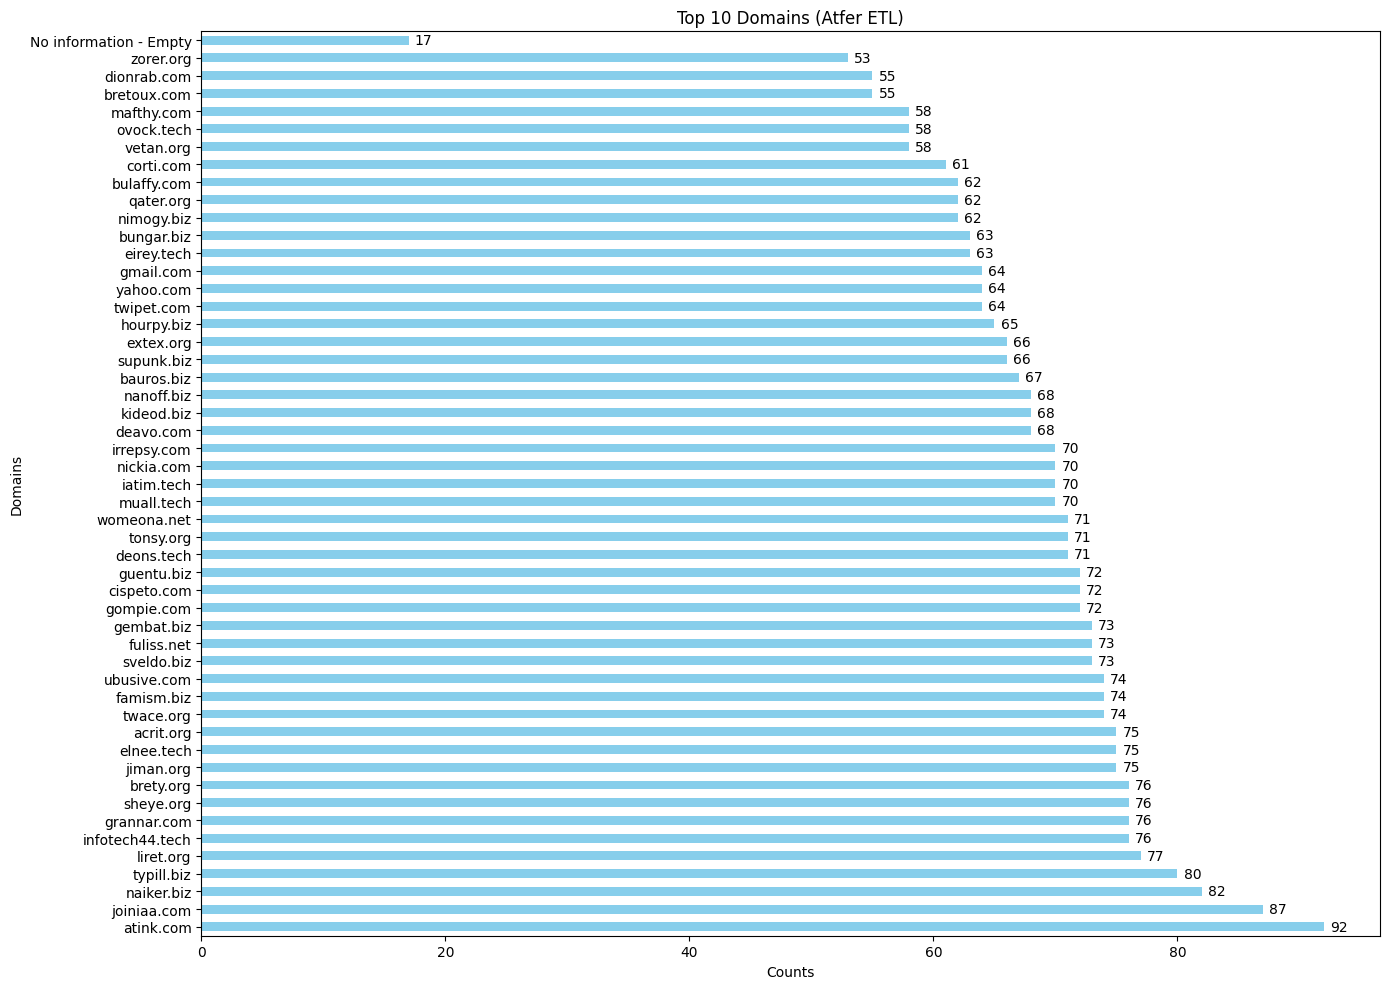

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))  
domains_no_dup.plot(kind='barh', color='skyblue')

counts = domains_no_dup.values

for i, count in enumerate(counts):
    plt.text(count + 0.5, i, str(count), color='black', va='center') 

plt.title('Top 10 Domains (Atfer ETL)')
plt.xlabel('Counts')
plt.ylabel('Domains')
plt.tight_layout()
plt.show()

In [26]:
info_no_dup['Temporary ID'] = info_no_dup['Temporary ID'].astype('int64')

In [27]:
info_no_dup

,Fullname,First Name,Last Name,Temporary ID,Original Created Date,Address,Country,City,Country City Detection,Country Detection,Email,Phone,Original Industry
0,Abbey Porter,Abbey,Porter,457508,2021-05-12,"Besson Avenue, 1005",Ireland,Limerick,City,"(Ireland, Limerick)",abbey_porter75675783@vetan.org,(+353) 8532182466,;Poultry and fish
1,Abdul Fisher,Abdul,Fisher,454197,2021-12-07,"Edwin Rue, 3956",England,-,Country,"(England, -)",abdul_fisher666937132@twipet.com,(+44) 4231262651,;Milling;Poultry and fish
2,Abdul Fox,Abdul,Fox,457516,2021-08-29,"Arlington Pass, 1149",Ireland,Dublin,City,"(Ireland, Dublin)",abdul_fox283273357@joiniaa.com,(+353) 3186084424,;Meat;Animal feeds;Bakery products
3,Abdul Graves,Abdul,Graves,459767,2021-07-18,"Cheney Hill, 5758",England,Milton Keynes,City,"(England, Milton Keynes)",abdul_graves475323926@jiman.org,(+44) 8056733305,;Animal feeds
4,Abdul Hunt,Abdul,Hunt,452538,2021-11-10,"Chatsworth Way, 4027",England,Oxford,City,"(England, Oxford)",abdul_hunt1407009784@bauros.biz,(+44) 6755718302,;Meat;Milling;Bakery products
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,Zoe Jackson,Zoe,Jackson,454591,2021-10-12,"Balfe Boulevard, 9646",Ireland,Dublin,City,"(Ireland, Dublin)",zoe_jackson621011117@bauros.biz,(+353) 6770631020,;Bakery products
3480,Zoe Owen,Zoe,Owen,425352,2021-11-02,"Tilloch Crossroad, 8332",Ireland,Dublin,City,"(Ireland, Dublin)",zoe_owen1652446013@bungar.biz,(+353) 5645416200,;Meat;Poultry and fish
3481,Zoe Summers,Zoe,Summers,459018,2021-03-15,"Catherine Drive, 8284",Ireland,-,Country,"(Ireland, -)",zoe_summers84316065@infotech44.tech,(+353) 6706675718,;Milling
3482,Zoe Wallace,Zoe,Wallace,460612,2021-05-29,"Bermondsey Drive, 6035",Ireland,Waterford,City,"(Ireland, Waterford)",zoe_wallace901459604@sveldo.biz,(+353) 7385000772,;Poultry and fish


In [ ]:
tf.upload_contacts_to_hubspot(info_no_dup, 'pat-na1-65727603-6f80-458d-8294-9773f68e52f6')

# What is your usual IDE

#### Usualmente uso Visual Studio Code

# What are the advantages of this IDE over the others?

#### Las ventajas que he detectado son por la versatilidad y sencillez que tiene para codificar en diferentes lenguajes, además de darme la posibilidad de personalizar todo el entorno para trabajar de una manera única y cómoda.

# Which of the items resulted in the most computational time for you? Add time in seconds

#### La parte más demorada computacionalmente fue la de obtener la información, como no se admiten cargas largas o ilimitadas de información, hay que realizar la carga por lotes, lo que supone tomar un poco más de tiempo mientras obtiene la información a través del paginado.

#  Please share the link with us if you have any public portfolio (e.g., IA, computer visión, data processing…).

#### No tengo ninguno actualmente